In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

[(-45.93918572332969, -74.84497972664984),
 (-63.68415094702236, 160.0703496057485),
 (55.03882688855299, -26.00690142261891),
 (37.980778659425496, -77.89821667794868),
 (34.73124012499386, 55.705215120720794),
 (-22.341318234837615, 8.74895410449281),
 (46.61510469489255, 16.37893896272962),
 (32.23602426243171, 121.82820385652087),
 (47.30415945253952, -114.61227163819359),
 (-87.69107490785731, -54.38014648106514),
 (62.92838635337179, -124.77460530249704),
 (-31.45134407747414, -167.56322278581422),
 (-5.895107248179713, 76.79106138790803),
 (47.86755026838529, -80.21226329946946),
 (-5.869933490341367, 139.43066908276808),
 (-36.05431247451803, -56.92209758362395),
 (-50.86542920730599, -166.95916612777594),
 (47.94033172606228, -128.8202595462264),
 (36.05254924925883, -25.13122416485706),
 (72.07314153438864, 91.86828724824954),
 (38.74751335259208, -35.460025882709914),
 (-73.49586730430235, -172.5151378276584),
 (-30.706396821354076, -10.557702359411365),
 (-17.93231191191202

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | flinders
Processing Record 2 of Set 1 | dongsheng
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | mahon
Processing Record 9 of Set 1 | melioratorov
Processing Record 10 of Set 1 | artyk
City not found. Skipping...
Processing Record 11 of Set 1 | osorno
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | genhe
Processing Record 14 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | kez
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | no

Processing Record 41 of Set 4 | buraydah
Processing Record 42 of Set 4 | qasigiannguit
Processing Record 43 of Set 4 | rach gia
Processing Record 44 of Set 4 | arraial do cabo
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | cape town
Processing Record 47 of Set 4 | novochernorechenskiy
Processing Record 48 of Set 4 | los cedrales
Processing Record 49 of Set 4 | bandarbeyla
Processing Record 50 of Set 4 | beloha
Processing Record 1 of Set 5 | chajul
Processing Record 2 of Set 5 | mantua
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | bilma
Processing Record 5 of Set 5 | touros
Processing Record 6 of Set 5 | faanui
Processing Record 7 of Set 5 | baiyin
Processing Record 8 of Set 5 | maniitsoq
Processing Record 9 of Set 5 | tual
Processing Record 10 of Set 5 | ajdabiya
Processing Record 11 of Set 5 | bengkulu
Processing Record 12 of Set 5 | mezen
Processing Record 13 of Set 5 | lolua
City not found. Skipping...
Processing Record 14 of Set 5 |

Processing Record 32 of Set 8 | emba
Processing Record 33 of Set 8 | verkhnyaya inta
Processing Record 34 of Set 8 | xuchang
Processing Record 35 of Set 8 | lyman
Processing Record 36 of Set 8 | bafq
Processing Record 37 of Set 8 | raga
Processing Record 38 of Set 8 | margate
Processing Record 39 of Set 8 | jaru
Processing Record 40 of Set 8 | constitucion
Processing Record 41 of Set 8 | hofn
Processing Record 42 of Set 8 | turukhansk
Processing Record 43 of Set 8 | bay roberts
Processing Record 44 of Set 8 | chicama
Processing Record 45 of Set 8 | banjar
Processing Record 46 of Set 8 | geraldton
Processing Record 47 of Set 8 | santa cecilia
Processing Record 48 of Set 8 | gat
Processing Record 49 of Set 8 | nizhnevartovsk
Processing Record 50 of Set 8 | santa vitoria do palmar
Processing Record 1 of Set 9 | pisco
Processing Record 2 of Set 9 | kavaratti
Processing Record 3 of Set 9 | vanavara
Processing Record 4 of Set 9 | cao bang
Processing Record 5 of Set 9 | grand forks
Processing

Processing Record 18 of Set 12 | pano polemidia
Processing Record 19 of Set 12 | alto araguaia
Processing Record 20 of Set 12 | srisailam
Processing Record 21 of Set 12 | acajutla
Processing Record 22 of Set 12 | nyandoma
Processing Record 23 of Set 12 | santa cruz de la palma
Processing Record 24 of Set 12 | marcona
City not found. Skipping...
Processing Record 25 of Set 12 | tidore
City not found. Skipping...
Processing Record 26 of Set 12 | merrill
Processing Record 27 of Set 12 | awjilah
Processing Record 28 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 29 of Set 12 | madan
Processing Record 30 of Set 12 | chute-aux-outardes
Processing Record 31 of Set 12 | iranshahr
Processing Record 32 of Set 12 | porto novo
Processing Record 33 of Set 12 | kamaishi
Processing Record 34 of Set 12 | bargal
City not found. Skipping...
Processing Record 35 of Set 12 | daru
Processing Record 36 of Set 12 | hoffman estates
Processing Record 37 of Set 12 | kayerkan
Processing Recor

NameError: name 'cities' is not defined

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Flinders,-34.5833,150.8552,62.19,93,98,5.01,AU,2022-04-26 18:13:03
1,Dongsheng,39.8161,109.9776,42.19,24,83,15.79,CN,2022-04-26 18:13:03
2,Yellowknife,62.4560,-114.3525,39.56,60,92,10.00,CA,2022-04-26 18:13:00
3,Chokurdakh,70.6333,147.9167,-0.87,100,100,5.95,RU,2022-04-26 18:13:04
4,Talnakh,69.4865,88.3972,11.21,95,79,6.76,RU,2022-04-26 18:13:04
5,Jamestown,42.0970,-79.2353,47.52,57,100,10.36,US,2022-04-26 18:13:05
6,Mount Gambier,-37.8333,140.7667,59.45,80,100,4.83,AU,2022-04-26 18:08:43
7,Mahon,39.8885,4.2658,63.16,63,0,6.91,ES,2022-04-26 18:08:48
8,Melioratorov,57.2107,65.6077,53.98,58,0,8.95,RU,2022-04-26 18:13:05
9,Osorno,-40.5667,-73.1500,52.11,66,75,8.05,CL,2022-04-26 18:13:06


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Flinders,AU,2022-04-26 18:13:03,-34.5833,150.8552,62.19,93,98,5.01
1,Dongsheng,CN,2022-04-26 18:13:03,39.8161,109.9776,42.19,24,83,15.79
2,Yellowknife,CA,2022-04-26 18:13:00,62.4560,-114.3525,39.56,60,92,10.00
3,Chokurdakh,RU,2022-04-26 18:13:04,70.6333,147.9167,-0.87,100,100,5.95
4,Talnakh,RU,2022-04-26 18:13:04,69.4865,88.3972,11.21,95,79,6.76
...,...,...,...,...,...,...,...,...,...
550,Srednekolymsk,RU,2022-04-26 18:28:29,67.4500,153.6833,15.48,95,100,12.82
551,Ryde,GB,2022-04-26 18:28:29,50.7300,-1.1621,55.15,67,45,5.99
552,Banda Aceh,ID,2022-04-26 18:28:29,5.5577,95.3222,81.10,82,98,6.71
553,Sehithwa,BW,2022-04-26 18:28:30,-20.4667,22.7167,80.06,31,59,8.01


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

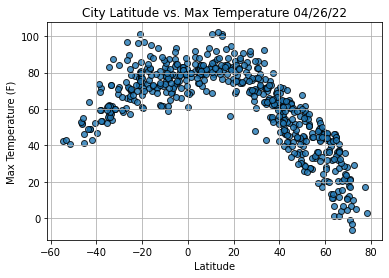

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

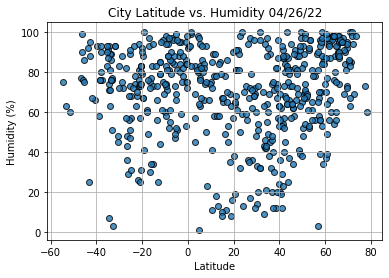

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

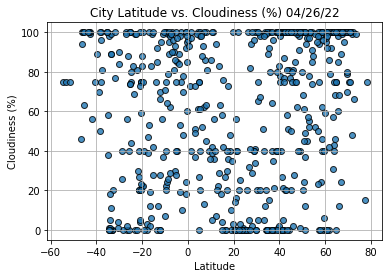

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

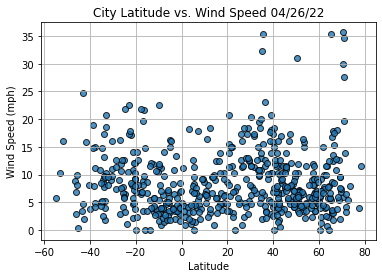

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                          Kez
Country                        RU
Date          2022-04-26 18:13:07
Lat                       57.8979
Lng                       53.7152
Max Temp                    52.52
Humidity                       93
Cloudiness                    100
Wind Speed                   9.15
Name: 13, dtype: object

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

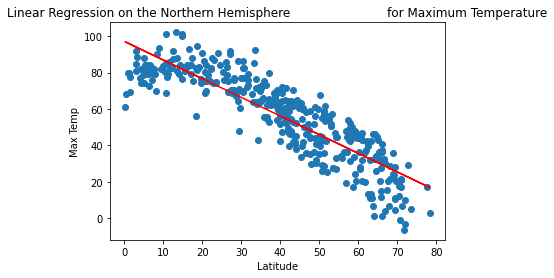

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,-20))

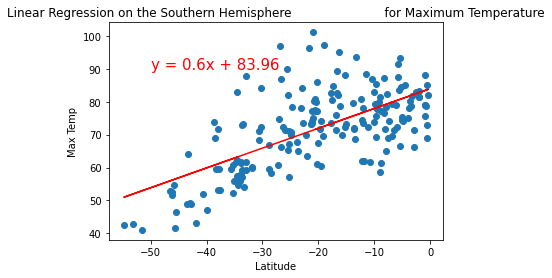

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

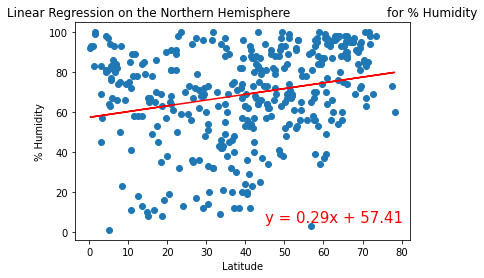

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,5))

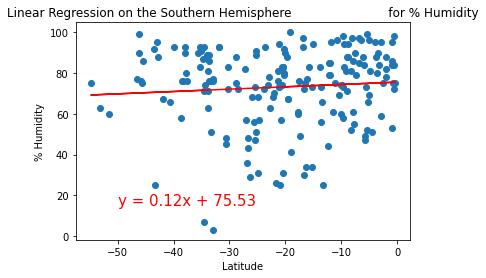

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

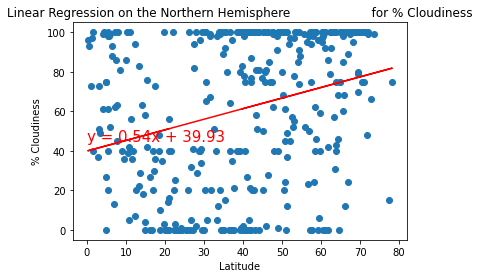

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(0,45))

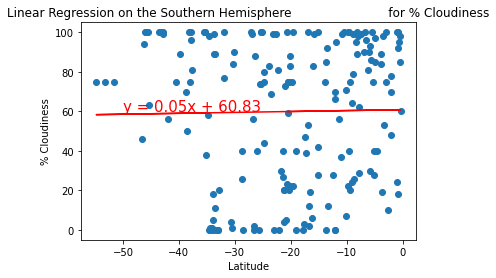

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


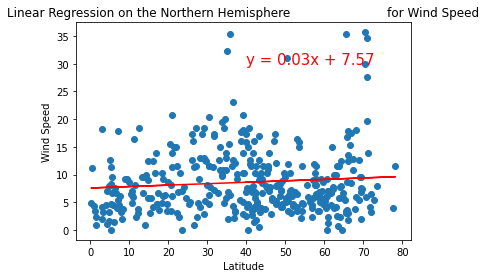

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

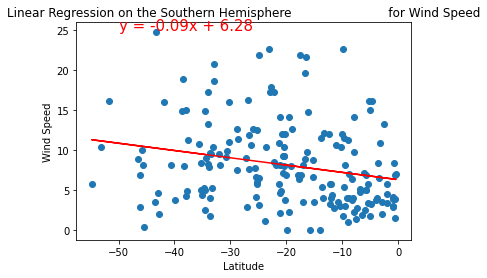

r_value is equal to -0.23027143848641268


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print("r_value is equal to",r_value)